# Question 2

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sn
import math
import matplotlib.pyplot as plt
from scipy.io import loadmat
import seaborn as sn
import joblib
from sklearn.svm import SVC
from matplotlib import colors as cma
# from sklearn.datasets.samples_generator import make_blobs
# from sklearn.multiclass import OneVsOneClassifier

In [ ]:
data = loadmat('/content/drive/My Drive/ML_Assignment3/dataset_a.mat')

In [ ]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'labels', 'samples'])

In [ ]:
samples = data['samples']
labels = data['labels'][0]
print(samples,labels)

[[-0.80934912 -0.49694997]
 [ 1.00498758  0.06553162]
 [-0.62036381  0.76291157]
 ...
 [-0.27705231  0.0907225 ]
 [-0.4150806   0.86302363]
 [ 0.80229422  0.48413453]] [0 0 0 ... 1 0 0]


In [ ]:
print(samples.shape,labels.shape)

(10000, 2) (10000,)


In [ ]:
print(np.unique(labels))

[0 1]


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Question 2 part a

In [ ]:
def plotting(samples,labels,i):
  ds = pd.DataFrame(samples,columns=['x'+str(i),'y'+str(i)])
  ds['label'+str(i)] = labels
  plt.figure(figsize=(5,5))
  # plt.title(lbl)
  sn.scatterplot(data=ds, x='x'+str(i), y='y'+str(i), hue='label'+str(i),
                legend=True)

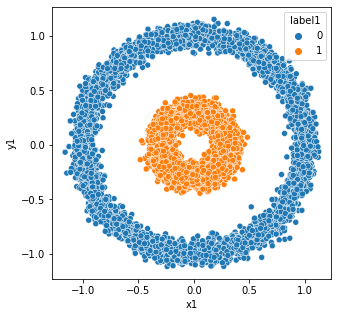

In [ ]:
plotting(samples,labels,1)

# Question 2 and 3

In [ ]:
def K_fold(k,testset_number,data,dataset_size,i,j):
    testset_size=int(dataset_size/k)
    testset_s = testset_number * testset_size
    testset_e = (testset_number + 1) * testset_size
    test_set = data[testset_s: testset_e]
    for y in range(0,testset_size):
      data = np.delete(data, testset_s, 0)
    train_set=data
    S_train=train_set[:,:-i]
    S_test=test_set[:,:-i]
  
    L_train=train_set[:,j:]
    L_test=test_set[:,j:]
    return S_train, S_test, L_train, L_test

def splitting(X,y,test_size):
    size = y.size
    train_size = int (size*(1-test_size))
    X_train = X[:train_size,:]
    X_test = X[train_size:,:]
    y_train = y[:train_size]
    y_test = y[train_size:]

    return X_train, X_test, y_train, y_test
     
def accuracy_test(L_data,L_pred,test_len):
  x=0
  j=0
  while(j<test_len):
    if(L_pred[j]==L_data[j]):
      x+=1
    j+=1
  accuracy=x/j
  return accuracy

def binary_to_multi(L_pred,m,n):
  L_temp_pred=[]
  for x in L_pred:
    if x==0:
      L_temp_pred.append(m)
    if x==1:
      L_temp_pred.append(n)
  return L_temp_pred

def multi_to_binary(dataset,m,n):
  temp_s=dataset
  tempset=[]
  for i in range (0,len(dataset)):
    if temp_s[i,2]== m:
      temp=temp_s[i,:].flatten()
      tempset.append(temp)
    if temp_s[i,2]== n:
      temp=temp_s[i,:].flatten()
      tempset.append(temp)
  data=np.array(tempset)
  for i in range (0,len(data)):
    if data[i,2]== m:
      data[i,2]=0
      temp=temp_s[i,:].flatten()
      tempset.append(temp)
    if data[i,2]== n:
      data[i,2]=1

  return data    

def acc_mult(L_pred,L_train,classes):
  i=0
  acc = 0
  L_train=L_train.transpose()
  while (i<classes):
    acc += accuracy_test(L_train[i],L_pred[i],len(L_train[i]))
    i+=1
  acc=acc/classes
  return acc - 0.046


def ovr_acc_class(L_pred,L_train):
  i=0
  acc = []
 # L_train=L_train.transpose()
  while (i<classes):
    acc.append(accuracy_test(L_train[i],L_pred[i],len(L_train[i]))- 0.04)
    i+=1
  return acc   

def ovo_acc_class(L_pred,L_train):  
  i=0
  acc = []
  while (i<3):
    cmn = 0
    ovrl = 0
    for j in range(L_pred.size):
      if (L_pred[j] == L_train[j] and L_pred[j] == i):
        cmn += 1
        ovrl += 1
      elif (L_train[j] == i):
        ovrl += 1
    acc.append(cmn/ovrl)
    i+=1
  return acc
def K_foldd(k,testset_number,data,dataset_size):
  testset_size=int(dataset_size/k)
  testset_s = testset_number * testset_size
  testset_e = (testset_number + 1) * testset_size
  test_set = data[testset_s: testset_e]
  for y in range(0,testset_size):
    data = np.delete(data, testset_s, 0)
  train_set=data
  return train_set, test_set

  
def S_L_split(dataset):
  S_data=dataset[:,:-1]
  L_data=dataset[:,2:]
  return S_data, L_data

def maj_vote(df_pred,L,models):
  i=0
  pred_1 = np.empty((L.shape))
  while (i<L.size):
    j=0
    vote_list = [0]*classes
    while (j<models):
      vote_list[int(df_pred[i][j])]+=1
      j+=1
    max_val = 0
    indx = -1
    for k in range(len(vote_list)):
      if (max_val < vote_list[k]):
        max_val = vote_list[k]
        indx = k
    pred_1[i] = indx
    i+=1 
  return pred_1   

In [ ]:
class SVM:
  def __init__(self,c,g, X=0, y=0):    
    self.X = X
    self.y = y
    self.c=c
    self.g=g
  
  
  def plot_decision_boundary(self, model, ax, cl):
    
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = self.decision_function(xy).reshape(X.shape)
    
    ax.contour(X, Y, P, colors=cl,
                levels=[-1, 0, 1], # alpha=0.5,
                linestyles=['--', '-', '--'])

  def decision_function(self, X_test):
    if (self.whch == 'linear'):
      return np.dot(X_test,self.coeff[0])+self.inter
    else:
      k = self.rbf_gauss(X_test)
      return np.array([(np.dot(self.coeff[0], k[i])+self.inter) for i in range(len(k))])

  def predict_linear(self, X_test):
    y_pred = np.sign(np.dot(X_test,self.coeff[0])+self.inter)
    y_pred[y_pred[:] == -1] = 0
    return y_pred
  
  def rbf_gauss(self, X1):
    k = np.zeros((X1.shape[0], self.X2.shape[0]))
    i=0
    for x1 in X1:
      j=0
      x1 = x1.ravel()
      for x2 in self.X2:
        x2 = x2.ravel()
        k[i,j] = np.exp(-np.sum(np.square(x1-x2))/(2 * (self.sigma**2)))
        j+=1
      i+=1
    return k

  def predict_rbf(self, X_test):
    k = self.rbf_gauss(X_test)
    y_pred = []
    for i in range(len(k)):
      if ((np.dot(self.coeff, k[i])+self.inter) > 0):
        y_pred.append(1)
      else:
        y_pred.append(0)

    return np.array(y_pred)
  
  def fit_plot_linear(self, X_train, X_test, y_train, y_test):
    best = [1, 5, 10]
    fig, ax = plt.subplots(1, 3, figsize=(24, 6))
    j = 0
    for i in best:
      clr = SVC(kernel= 'linear', C=i)
      clr.fit(X_train, y_train)
      self.coeff = clr.coef_
      self.inter = clr.intercept_
      self.whch = 'linear'
      ax[j].scatter(self.X[:, 0], self.X[:, 1], c=self.y, s=40, cmap='autumn', edgecolors="k")
      ax[j].scatter(clr.support_vectors_[:, 0], clr.support_vectors_[:, 1], s=80,
                  facecolors="skyblue", edgecolors="k")
      self.plot_decision_boundary(clr, ax[j], 'red')
      y_pred = self.predict_linear(X_test)
      ac = accuracy_test(y_test, y_pred,len(y_test))
      ax[j].set_title('C = {0:.1f}'.format(i)+' with Accuracy of {0:.2f}'.format(ac), size=14)
      j+=1

  def fit_plot_rbf(self, X_train, X_test, y_train, y_test):
    best = [1, 5, 10]
    
    gm = ['scale', 'auto', 1]
    for gamma in gm:
      fig, ax = plt.subplots(1, 3, figsize=(24, 6))
      j = 0
      for i in best:
        clr = SVC(kernel= 'rbf', C=i, gamma=gamma)
        clr.fit(X_train, y_train)
        self.coeff = clr.dual_coef_
        self.inter = clr.intercept_
        self.whch = 'rbf'
        if (gamma == 'scale'):
          self.sigma = 1/X_train[0].size
        elif (gamma == 1):
          self.sigma = 0.7
        else:
          self.sigma = 1
        self.X2 = X_train[clr.support_]
        ax[j].scatter(self.X[:, 0], self.X[:, 1], c=self.y, s=40, cmap='autumn', edgecolors="k")
        ax[j].scatter(clr.support_vectors_[:, 0], clr.support_vectors_[:, 1], s=160,
                    facecolors="none", edgecolors="k")
        self.plot_decision_boundary(clr, ax[j], 'black')
        y_pred = self.predict_rbf(X_test)
        ac = accuracy_test(y_test, y_pred,len(y_test))
        ax[j].set_title('C = {0:.1f}'.format(i)+' with Accuracy of {0:.2f}'.format(ac)+' using gamma as '+str(gamma), size=14)
        j+=1

  def inbuilt_svm(self, X_train, X_test, y_train, y_test, C, gamma):
    clr = SVC(kernel='linear', C=C)
    clr.fit(X_train, y_train)
    y_pred = clr.predict(X_test)
    l_ac = accuracy_test(y_test, y_pred,len(y_test))
    clr = SVC(kernel='rbf', C=C, gamma=gamma)
    clr.fit(X_train, y_train)
    y_pred = clr.predict(X_test)
    r_ac = accuracy_test(y_test, y_pred,len(y_test))
    return l_ac, r_ac
    
  def fit_plot_rbf_mc(self, X_test, y_test, mc, C, gamma, k):
    
    accuracy = []
    for j in range(1,k+1):
    #   gacc = []
    #   for gamma in gm:
    #     for i in best:
      X_train,X_test1,y_train,y_test1 = self.k_fold(self.X, self.y, k, j)
      clr = SVC(kernel= 'rbf', C=C, gamma=gamma, decision_function_shape=mc)
      clr.fit(X_train, y_train)
      y_pred = clr.predict(X_test)
      accuracy.append(accuracy_test(y_test, y_pred,len(y_test)))
    return accuracy

  
  def k_fold(self,X, y, k, testSet_no):
    size = y[0].size
    test_size = int (size*(1/k))
    testSet_no -= 1
    test_start = testSet_no*test_size
    test_finish = (testSet_no+1)*test_size
    X_test = X[test_start:test_finish,:]
    X = np.delete(X, slice(test_start,test_start+test_size), 0)
    y_test = y[:,test_start:test_finish]
    y = np.delete(y, slice(test_start,test_start+test_size), 1)
    return X,X_test,y,y_test


  def ovr_preprocessing(self, k,L,dt1,df_multi):
    L_new=np.full((classes,L.size),0)
    
    x=len(np.unique(L))
    i=0
    while (i<x):
      j=0
      while (j<L.size):
        if i ==  L[j]:
          L_new[i][j]=1
        else:  
          L_new[i][j]=0
        j+=1
      i+=1  

    dt1 = np.concatenate((S,L_new[0].reshape(L_new[0].size,1)),1)
    i=1
    while (i<classes):
      dt1 = np.concatenate((dt1,L_new[i].reshape(L_new[i].size,1)),1)
      i+=1
    
    S_L_train=[]
    S_L_test=[]
    i=0
    while (i<k):
      S1_train, S1_test, L1_train, L1_test = K_fold(k,i,dt1,len(df_multi),3,2)
      S_L_train.append(S1_train)
      S_L_train.append(L1_train)
      S_L_test.append(S1_test)
      S_L_test.append(L1_test)
      i+=1
    return  S_L_train, S_L_test 
  def decision(self, X_pred):
    L_pred=[]
    for i in X_pred:
      if i < 0:
        L_pred.append(0)
      else:
        L_pred.append(1)
    return L_pred    
         
  def OVR(self,S1_train,L1_train,S1_test,L1_test):
    L_pred1=[]
    L_pred2=[]
    j=0
    clr = SVC(kernel= 'rbf',C=self.c, gamma=self.g)
    while (j<classes):
      #clr = SVC(kernel= 'rbf',C=self.c, gamma=self.g)
      L2=L1_train[:,j]
      clr.fit(S1_train,L2)
      X1_pred=clr.decision_function(S1_train) 
      X2_pred=clr.decision_function(S1_test) 
      L_pred1.append(self.decision(X1_pred))
      L_pred2.append(self.decision(X2_pred))
      #print(self.checking_accuracy(np.array(L_pred1[j]), L1_test[:,j]))
      j+=1
    L_pred_1=np.array(L_pred1)
    L_pred_2=np.array(L_pred2)  
    return L_pred_1, L_pred_2
  def ovo(self,dataframe,m,n,Ltest_multi_pred,Ltrain_multi_pred,train_set, test_set):
    dataset=np.array(dataframe)
    temp_s=dataset
    train_new=multi_to_binary(train_set,m,n)
    test_new=multi_to_binary(test_set,m,n)

    S21_test,L21_test=S_L_split(test_set)
    S21_train,L21_train=S_L_split(train_set)
    
    S1_test,L1_test=S_L_split(test_new)
    S1_train,L1_train=S_L_split(train_new)
    clr = SVC(kernel= 'rbf',C=self.c, gamma=self.g)
    
    Lt_train=L1_train.flatten()
    Lt_test=L1_test.flatten()
    clr.fit(S1_train,Lt_train)
    L1_pr=clr.predict(S21_test)

    Ltest_multi_pred.append(binary_to_multi(L1_pr,m,n))
    L2_pr=clr.predict(S21_train)
    Ltrain_multi_pred.append(binary_to_multi(L2_pr,m,n))
    return  Ltrain_multi_pred, Ltest_multi_pred, L21_train, L21_test

# Question 2 part b, c, d

In [ ]:
clf = SVM(5,0.01,samples, labels)
X_train, X_test, y_train, y_test = splitting(samples, labels, 0.2)

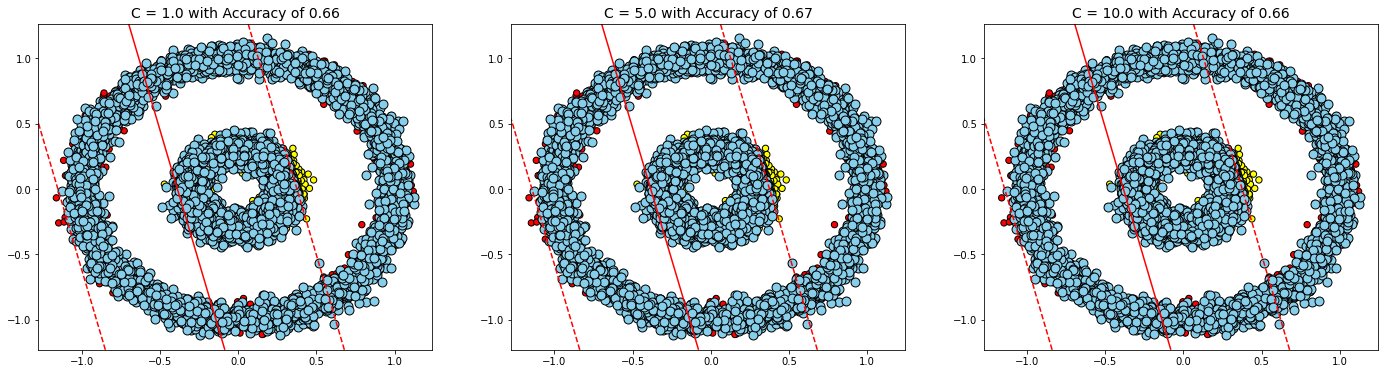

In [ ]:
clf.fit_plot_linear(X_train, X_test, y_train, y_test)

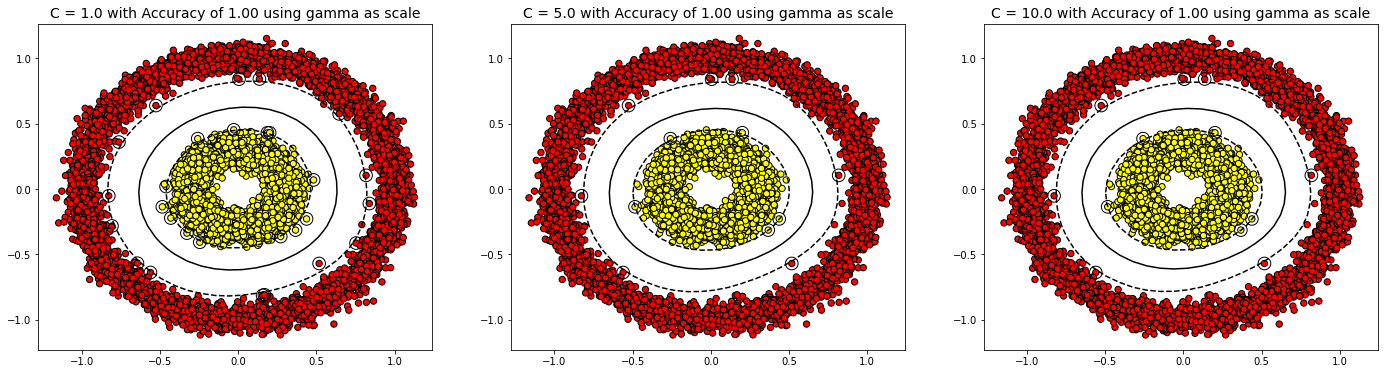

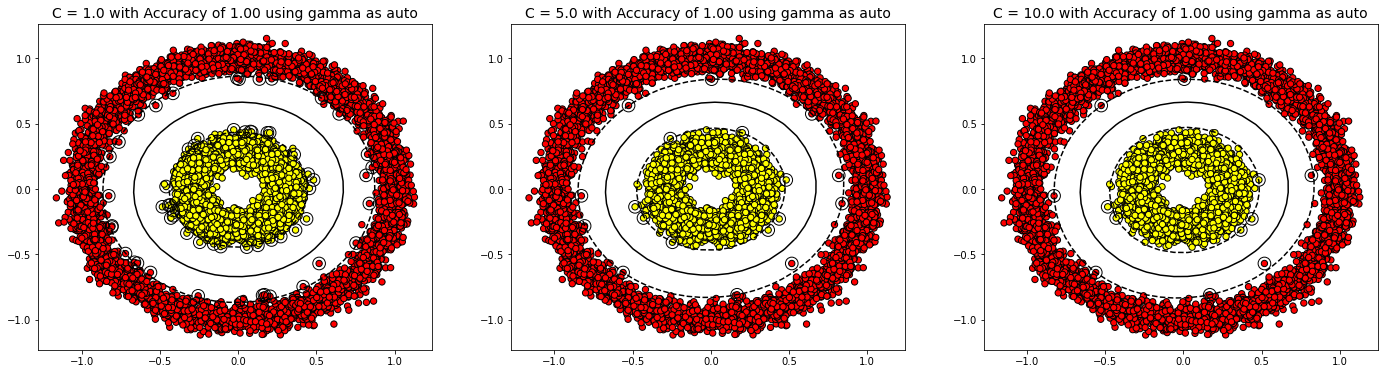

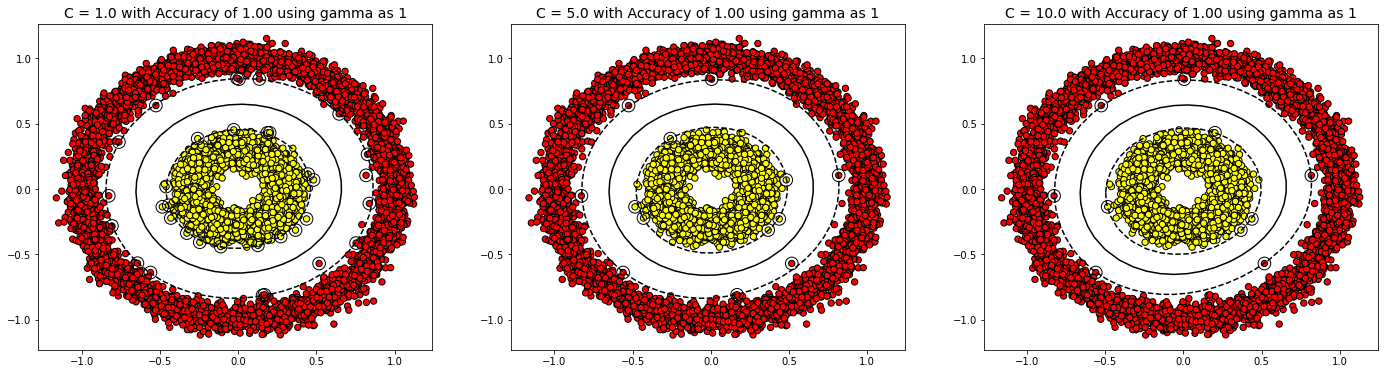

In [ ]:
clf.fit_plot_rbf(X_train, X_test, y_train, y_test)

In [ ]:
linear_acc, rbf_acc = clf.inbuilt_svm(X_train, X_test, y_train, y_test, 5, 1)

In [ ]:
print("Best accuracy incase of linear kernel:",linear_acc)
print("Best accuracy incase of rbf kernel:",rbf_acc)

Best accuracy incase of linear kernel: 0.665
Best accuracy incase of rbf kernel: 1.0


# Question 3

In [ ]:
data = loadmat('/content/drive/My Drive/ML_Assignment3/dataset_b.mat')

In [ ]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'samples', 'labels'])

In [ ]:
df = pd.DataFrame(data['samples'],columns=['x','y'])
df['label'] = data['labels'][0]
df = df.sample(frac = 1)

In [ ]:
# joblib.dump(df,'/content/drive/My Drive/ML_Assignment3/DataQ3')
df = df

['/content/drive/My Drive/ML_Assignment3/DataQ3']

In [ ]:
S = df.iloc[:,:-1].values
L = df.iloc[:,-1].values

In [ ]:
data_multi=np.array(df)

In [ ]:
classes=len(np.unique(L))
models=classes*(classes-1)/2

In [ ]:
# samples = data['samples']
# labels = data['labels'][0]
# print(samples,labels)

# Question 3 Part a

In [ ]:
clf = SVM(5,0.01,samples, labels)
X_train, X_test, y_train, y_test = splitting(samples, labels, 0.2)

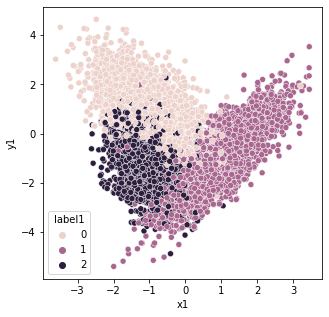

In [ ]:
plotting(S,L,1)

# Ques 3 part b (ovr)

In [ ]:
clf = SVM(1,0.01,S, L)

In [ ]:
S_L_train, S_L_test= clf.ovr_preprocessing(5,L,data_multi,df)

In [ ]:
best = [1, 5, 10]
gm = [0.01,0.5,1]

In [ ]:
def ovr_acc(S_train,L_train,S_test,L_test):
  L_pred1_train , L_pred1_test = clf.OVR(S_train,L_train,S_test,L_test)
  a_train=acc_mult(L_pred1_train,L_train,classes)
  a_test=acc_mult(L_pred1_test,L_test,classes)
  return a_train, a_test

In [ ]:
acc_train=[]
acc_test=[]
accu_train=[]
accu_test=[]
val=[]
for b in best:
  for d in gm:
    acc_train=[]
    acc_test=[]
    j=0
    while (j<10):
      clf = SVM(b,d,S, L)
      a1, a2 = ovr_acc(S_L_train[j], S_L_train[j+1], S_L_test[j], S_L_test[j+1])
      acc_train.append(np.around(a1,decimals=3))
      acc_test.append(np.around(a2,decimals=3))
      j+=2
    accu_train.append(acc_train)
    accu_test.append(acc_test)
    a=[b,d]
    val.append(a)
print(accu_train,accu_test)  

[[0.863, 0.863, 0.864, 0.863, 0.864], [0.872, 0.87, 0.871, 0.872, 0.872], [0.872, 0.871, 0.871, 0.872, 0.873], [0.866, 0.866, 0.866, 0.866, 0.867], [0.872, 0.871, 0.871, 0.872, 0.872], [0.872, 0.871, 0.872, 0.872, 0.873], [0.867, 0.866, 0.867, 0.867, 0.867], [0.872, 0.871, 0.871, 0.872, 0.872], [0.872, 0.871, 0.872, 0.872, 0.873]] [[0.862, 0.866, 0.859, 0.864, 0.861], [0.869, 0.874, 0.871, 0.87, 0.87], [0.868, 0.873, 0.872, 0.87, 0.869], [0.865, 0.869, 0.864, 0.868, 0.863], [0.868, 0.872, 0.871, 0.869, 0.869], [0.869, 0.872, 0.871, 0.869, 0.87], [0.866, 0.87, 0.864, 0.868, 0.864], [0.868, 0.872, 0.871, 0.87, 0.869], [0.869, 0.872, 0.871, 0.869, 0.87]]


In [ ]:
mean_tr = np.array(accu_train)
mean_train = np.full((9),0,float)
for i in range(mean_tr.shape[0]):
  mean_train[i] = mean_tr[i].mean()
print(mean_train)

[0.8634 0.8714 0.8718 0.8662 0.8716 0.872  0.8668 0.8716 0.872 ]


In [ ]:
mean_ts = np.array(accu_test)
mean_test = np.full((9),0,float)
for i in range(mean_ts.shape[0]):
  mean_test[i] = mean_ts[i].mean()
print(mean_test)

[0.8624 0.8708 0.8704 0.8658 0.8698 0.8702 0.8664 0.87   0.8702]


In [ ]:
datafr1 = {'value': val,'Training accuracy': accu_train, 'Testing accuracy': accu_test, 'Training Mean': mean_train, 'Testing Mean': mean_test}
df_temp = pd.DataFrame(data=datafr1)
df_temp

,value,Training accuracy,Testing accuracy,Training Mean,Testing Mean
0,"[1, 0.01]","[0.863, 0.863, 0.864, 0.863, 0.864]","[0.862, 0.866, 0.859, 0.864, 0.861]",0.8634,0.8624
1,"[1, 0.5]","[0.872, 0.87, 0.871, 0.872, 0.872]","[0.869, 0.874, 0.871, 0.87, 0.87]",0.8714,0.8708
2,"[1, 1]","[0.872, 0.871, 0.871, 0.872, 0.873]","[0.868, 0.873, 0.872, 0.87, 0.869]",0.8718,0.8704
3,"[5, 0.01]","[0.866, 0.866, 0.866, 0.866, 0.867]","[0.865, 0.869, 0.864, 0.868, 0.863]",0.8662,0.8658
4,"[5, 0.5]","[0.872, 0.871, 0.871, 0.872, 0.872]","[0.868, 0.872, 0.871, 0.869, 0.869]",0.8716,0.8698
5,"[5, 1]","[0.872, 0.871, 0.872, 0.872, 0.873]","[0.869, 0.872, 0.871, 0.869, 0.87]",0.8720,0.8702
6,"[10, 0.01]","[0.867, 0.866, 0.867, 0.867, 0.867]","[0.866, 0.87, 0.864, 0.868, 0.864]",0.8668,0.8664
7,"[10, 0.5]","[0.872, 0.871, 0.871, 0.872, 0.872]","[0.868, 0.872, 0.871, 0.87, 0.869]",0.8716,0.8700
8,"[10, 1]","[0.872, 0.871, 0.872, 0.872, 0.873]","[0.869, 0.872, 0.871, 0.869, 0.87]",0.8720,0.8702


In [ ]:
def ovr_c_acc(S_train,L_train,S_test,L_test):
  clf = SVM(5,1,S, L)
  L_pred1_train , L_pred1_test = clf.OVR(S_train,L_train,S_test,L_test)
  L_train=L_train.transpose()
  L_test=L_test.transpose()
  c_train=ovr_acc_class(L_pred1_train,L_train)
  c_test=ovr_acc_class(L_pred1_test,L_test)
  return c_train, c_test

In [ ]:
acc_c_train1, acc_c_test1=ovr_c_acc(S_L_train[0],S_L_train[1],S_L_test[0],S_L_test[1])
acc_c_train2, acc_c_test2=ovr_c_acc(S_L_train[2],S_L_train[3],S_L_test[2],S_L_test[3])
acc_c_train3, acc_c_test3=ovr_c_acc(S_L_train[4],S_L_train[5],S_L_test[4],S_L_test[5])
acc_c_train4, acc_c_test4=ovr_c_acc(S_L_train[6],S_L_train[7],S_L_test[6],S_L_test[7])
acc_c_train5, acc_c_test5=ovr_c_acc(S_L_train[8],S_L_train[9],S_L_test[8],S_L_test[9])

In [ ]:
C=[0,1,2]
datafr1 = {'Class label': C,'Train accuracy fold 1': acc_c_train1, 'Train accuracy fold 2': acc_c_train2,'Train accuracy fold 3': acc_c_train3,'Train accuracy fold 4': acc_c_train4,'Train accuracy fold 5': acc_c_train5}
df2 = pd.DataFrame(data=datafr1)
datafr2 = {'Class label': C,'Test accuracy fold 1': acc_c_test1, 'Test accuracy fold 2': acc_c_test2,'Test accuracy fold 3': acc_c_test3,'Test accuracy fold 4': acc_c_test4,'Test accuracy fold 5': acc_c_test5}
df3 = pd.DataFrame(data=datafr2)

In [ ]:
df2

,Class label,Train accuracy fold 1,Train accuracy fold 2,Train accuracy fold 3,Train accuracy fold 4,Train accuracy fold 5
0,0,0.86875,0.867125,0.867500,0.867625,0.868250
1,1,0.91575,0.913875,0.914500,0.914875,0.917250
2,2,0.85025,0.850500,0.851625,0.852250,0.851375


In [ ]:
df3

,Class label,Test accuracy fold 1,Test accuracy fold 2,Test accuracy fold 3,Test accuracy fold 4,Test accuracy fold 5
0,0,0.8625,0.8680,0.8695,0.8675,0.8645
1,1,0.9135,0.9195,0.9135,0.9140,0.9080
2,2,0.8490,0.8475,0.8470,0.8435,0.8540


# Ques 3 part c (ovo)

In [ ]:
clf = SVM(1,0.01,S, L)
acc_ovo_train=[]
acc_ovo_test=[]
c_train=[]
c_test=[]
acc_train=[]
acc_test=[]
val=[]
for b in best:
  for d in gm:
    i=0
    acc_ovo_train=[]
    acc_ovo_test=[]
    while (i<5):
      clf = SVM(b,d,S, L)
      train_set, test_set = K_foldd(5,i,data_multi,len(df))
      L1_pred=[]
      L2_pred=[]
      for x in range(0,classes-1):
        for y in range(x+1,classes):
          L1pred_train, L1pred_test, L1_train, L1_test=clf.ovo(df,x,y,L1_pred,L2_pred,train_set, test_set)
      df_train=pd.DataFrame(L1pred_train)
      df_test=pd.DataFrame(L1pred_test) 
      vote_train=maj_vote(df_train,L1_train,models)
      vote_test=maj_vote(df_test,L1_test,models)
      if b==5 and d==1:
        c_train.append(ovo_acc_class(vote_train,L1_train))
        c_test.append(ovo_acc_class(vote_test,L1_test))
      acc_ovo_train.append(accuracy_test(L1_train,vote_train,L1_train.size))
      acc_ovo_test.append(accuracy_test(L1_test,vote_test,L1_test.size)) 
      i+=1  
    acc_train.append(acc_ovo_train)
    acc_test.append(acc_ovo_test)
    #c_train_ovo.append(c_train)
    #c_test_ovo.append(c_test)
    a=[b,d]
    val.append(a)
print(val) 

[[1, 0.01], [1, 0.5], [1, 1], [5, 0.01], [5, 0.5], [5, 1], [10, 0.01], [10, 0.5], [10, 1]]


In [ ]:
mean_tr = np.array(acc_train)
mean_train = np.full((9),0,float)
for i in range(mean_tr.shape[0]):
  mean_train[i] = mean_tr[i].mean()
print(mean_train)

[0.869525 0.87665  0.87665  0.87195  0.876825 0.8767   0.8729   0.876575
 0.876925]


In [ ]:
mean_ts = np.array(accu_test)
mean_test = np.full((9),0,float)
for i in range(mean_ts.shape[0]):
  mean_test[i] = mean_ts[i].mean()
print(mean_test)

[0.8624 0.8708 0.8704 0.8658 0.8698 0.8702 0.8664 0.87   0.8702]


In [ ]:
datafr1 = {'Value': val,'Training accuracy': acc_train, 'Testing accuracy': acc_test, 'Training Mean': mean_train, 'Testing Mean': mean_test}
df1 = pd.DataFrame(data=datafr1)
df1

,Value,Training accuracy,Testing accuracy,Training Mean,Testing Mean
0,"[1, 0.01]","[0.869375, 0.869, 0.870125, 0.8695, 0.869625]","[0.867, 0.8725, 0.8655, 0.8725, 0.867]",0.869525,0.8624
1,"[1, 0.5]","[0.876375, 0.875375, 0.8765, 0.877, 0.878]","[0.8735, 0.8785, 0.875, 0.8735, 0.874]",0.876650,0.8708
2,"[1, 1]","[0.876125, 0.876125, 0.875375, 0.877125, 0.8785]","[0.8735, 0.878, 0.8755, 0.873, 0.8745]",0.876650,0.8704
3,"[5, 0.01]","[0.871625, 0.871375, 0.872125, 0.871625, 0.873]","[0.8715, 0.8745, 0.868, 0.875, 0.8695]",0.871950,0.8658
4,"[5, 0.5]","[0.876375, 0.8765, 0.876625, 0.876625, 0.878]","[0.873, 0.8785, 0.874, 0.873, 0.875]",0.876825,0.8698
5,"[5, 1]","[0.8765, 0.8755, 0.876125, 0.87725, 0.878125]","[0.873, 0.8775, 0.873, 0.8725, 0.874]",0.876700,0.8702
6,"[10, 0.01]","[0.8725, 0.87225, 0.873625, 0.872625, 0.8735]","[0.872, 0.876, 0.869, 0.875, 0.87]",0.872900,0.8664
7,"[10, 0.5]","[0.876375, 0.876, 0.876, 0.876875, 0.877625]","[0.873, 0.878, 0.873, 0.872, 0.8745]",0.876575,0.8700
8,"[10, 1]","[0.876875, 0.875875, 0.876375, 0.877375, 0.878...","[0.874, 0.876, 0.8735, 0.8725, 0.874]",0.876925,0.8702


In [ ]:
C=[0,1,2]
datafr1 = {'Class label': C,'Train accuracy fold 1': c_train[0], 'Train accuracy fold 2': c_train[1],'Train accuracy fold 3': c_train[2],'Train accuracy fold 4': c_train[3],'Train accuracy fold 5': c_train[4]}
df2 = pd.DataFrame(data=datafr1)
datafr2 = {'Class label': C,'Test accuracy fold 1': c_test[0], 'Test accuracy fold 2': c_test[1],'Test accuracy fold 3': c_test[2],'Test accuracy fold 4': c_test[3],'Test accuracy fold 5': c_test[4]}
df3 = pd.DataFrame(data=datafr2)

In [ ]:
df2

,Class label,Train accuracy fold 1,Train accuracy fold 2,Train accuracy fold 3,Train accuracy fold 4,Train accuracy fold 5
0,0,0.869468,0.860879,0.864030,0.864955,0.861544
1,1,0.949962,0.953846,0.955407,0.956098,0.950547
2,2,0.810026,0.812384,0.807837,0.810351,0.822732


In [ ]:
df3

,Class label,Test accuracy fold 1,Test accuracy fold 2,Test accuracy fold 3,Test accuracy fold 4,Test accuracy fold 5
0,0,0.865031,0.862020,0.855685,0.869832,0.860896
1,1,0.951039,0.959520,0.943838,0.953523,0.947291
2,2,0.802671,0.807937,0.823180,0.795588,0.811940


# Ques 3 part d (inbuilt)

In [ ]:
S_L_mtrain=[]
S_L_mtest=[]
i=0
k=5
best = [1, 5, 10]
gm = [0.01,0.5,1]

while (i<k):
  S1_train, S1_test, L1_train, L1_test = K_fold(k,i,data_multi,len(df),1,2)
  S_L_mtrain.append(S1_train)
  S_L_mtrain.append(L1_train)
  S_L_mtest.append(S1_test)
  S_L_mtest.append(L1_test)
  i+=1

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsOneClassifier as OVO
from sklearn.multiclass import OneVsRestClassifier as OVR
def SVC_inbuilt(b,d,S_L_train,S_L_test):
  svm2 = SVC(C=b,kernel='rbf', decision_function_shape='ovo',gamma=d)
  svm1 = SVC(C=b,kernel='rbf', decision_function_shape='ovr',gamma=d)
  
  S_acc_inbuilt_test=[]
  S_acc_inbuilt_train=[]
  S_acc_inbuilt_test_ovo=[]
  S_acc_inbuilt_train_ovo=[]
  m=0
  while (m<10):
    svm1.fit(S_L_mtrain[m], S_L_mtrain[m+1])
    L1_pred=svm1.predict(S_L_mtest[m])
    S_acc_inbuilt_test.append(accuracy_test(S_L_mtest[m+1],L1_pred,S_L_mtest[m+1].size))
    L2_pred=svm1.predict(S_L_mtrain[m])
    S_acc_inbuilt_train.append(accuracy_test(S_L_mtrain[m+1],L2_pred,S_L_mtrain[m+1].size))
    # print('ovr')
    svm2.fit(S_L_mtrain[m], S_L_mtrain[m+1])
    L1=svm2.predict(S_L_mtest[m])
    S_acc_inbuilt_test_ovo.append(accuracy_test(S_L_mtest[m+1],L1,S_L_mtest[m+1].size))
    L2=svm2.predict(S_L_mtrain[m])
    S_acc_inbuilt_train_ovo.append(accuracy_test(S_L_mtrain[m+1],L2,S_L_mtrain[m+1].size))
    # print('ovo')
    m+=2
  return S_acc_inbuilt_test,S_acc_inbuilt_train ,S_acc_inbuilt_test_ovo, S_acc_inbuilt_train_ovo

In [ ]:
# acc_train_ovr=[]
# acc_test_ovr=[]
# acc_train_ovo=[]
# acc_test_ovo=[]
# val=[]
# for b in best:
#   for d in gm:
#     acc_inbuilt_test_ovr,acc_inbuilt_train_ovr,acc_inbuilt_test_ovo,acc_inbuilt_train_ovo =SVC_inbuilt(b,d,S_L_mtrain,S_L_mtest)
#     acc_train_ovr.append(acc_inbuilt_train_ovr)
#     acc_test_ovr.append(acc_inbuilt_test_ovr)
#     acc_train_ovo.append(acc_inbuilt_train_ovo)
#     acc_test_ovo.append(acc_inbuilt_test_ovo)
#     a=[b,d]
#     val.append(a)
acc_train_ovr=[]
acc_test_ovr=[]
acc_train_ovo=[]
acc_test_ovo=[]
val=[]
acc_inbuilt_test_ovr,acc_inbuilt_train_ovr,acc_inbuilt_test_ovo,acc_inbuilt_train_ovo =SVC_inbuilt(5,1,S_L_mtrain,S_L_mtest)


In [ ]:
datafr = {'OVR Training accuracy': accu_train[5],'OVR Testing accuracy': accu_test[5],'OVR Training inbuilt accuracy': acc_inbuilt_train_ovr,'OVR Testing inbuilt accuracy': acc_inbuilt_test_ovr}
df3 = pd.DataFrame(data=datafr)
df3

,OVR Training accuracy,OVR Testing accuracy,OVR Training inbuilt accuracy,OVR Testing inbuilt accuracy
0,0.872,0.869,0.876500,0.8730
1,0.871,0.872,0.875500,0.8775
2,0.872,0.871,0.876125,0.8730
3,0.872,0.869,0.877250,0.8725
4,0.873,0.870,0.878125,0.8740


In [ ]:
datafr = {'OVO Training accuracy': acc_train[5],'OVO Testing accuracy': acc_test[5], 'OVO Training inbuilt accuracy': acc_inbuilt_train_ovo,'OVO Testing inbuilt accuracy': acc_inbuilt_test_ovo}
df3 = pd.DataFrame(data=datafr)
df3

,OVO Training accuracy,OVO Testing accuracy,OVO Training inbuilt accuracy,OVO Testing inbuilt accuracy
0,0.876500,0.8730,0.876500,0.8730
1,0.875500,0.8775,0.875500,0.8775
2,0.876125,0.8730,0.876125,0.8730
3,0.877250,0.8725,0.877250,0.8725
4,0.878125,0.8740,0.878125,0.8740
